In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst

In [2]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA()
print("finished DEKA simulation")

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished DEKA simulation


In [3]:
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS()
print("finished RLS simulation")

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished RLS simulation


In [4]:
x_kf,  u_kf,  theta_kf,  theta_hat_kf  = param_est.simulate_quadrotor_hover_with_KF()
print("finished KF simulation")
# x_mpc,  u_mpc,  theta_mpc,  theta_hat_mpc  = param_est.simulate_quadrotor_hover_with_no_estimation()
# print("finished naive mpc simulation")


# Suppose x_deka, x_rls each have shape (N, 3) for position in x,y,z.
# Also assume you have a desired (reference) trajectory x_des, shape (N, 3).
num_points = 600
angles = np.linspace(0, 6*np.pi, num_points, endpoint=False)
# Create the figure-8 in the XY-plane
x = np.sin(angles)
y = np.sin(2 * angles)
z = np.zeros_like(x)  # Initially flat in XY-plane

# Stack as a (3, num_points) matrix
traj = np.vstack((x, y, z))  # Shape: (3, num_points)

# Define rotation matrix (tilt around the Y-axis)
rot_ang= np.radians(30)  # Tilt angle in degrees
R = np.array([
    [np.cos(rot_ang), 0, np.sin(rot_ang)],  # Rotation matrix for X-Z plane
    [0, 1, 0],  # Keep Y unchanged
    [-np.sin(rot_ang), 0, np.cos(rot_ang)]
])

# Apply rotation
traj_rotated = (R @ traj).T  # Matrix multiplication
x_des = traj.T  # Transpose back to original shape
# 2) Plot x, y, z positions for DEKA vs RLS vs desired
t = np.arange(len(x_deka))  # time steps 0..N-1


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished KF simulation


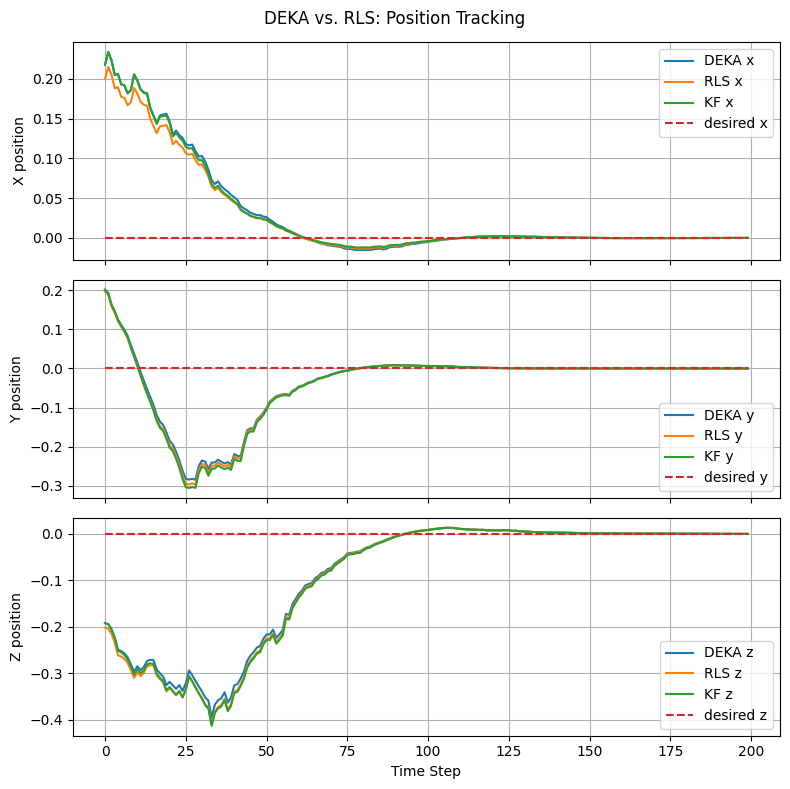

In [5]:
x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_kf   = [row[0] for row in x_kf]
# x_pos_mpc = [row[0] for row in x_mpc]
# x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_kf   = [row[1] for row in x_kf]
# y_pos_mpc = [row[1] for row in x_mpc]

# y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_kf   = [row[2] for row in x_kf]
# z_pos_mpc = [row[2] for row in x_mpc]

# z_pos_des   = [row[2] for row in x_des][:200]

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_kf)
theta_ekf_array = np.array(theta_kf)

hov_des = np.zeros_like(x_pos_deka)
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
# X position
axs[0].plot(t, x_pos_deka, label='DEKA x')
axs[0].plot(t, x_pos_rls, label='RLS x')
axs[0].plot(t, x_pos_kf, label='KF x')
# axs[0].plot(t, x_pos_mpc, '.', label='No Est. x')
axs[0].plot(t, hov_des, '--', label='desired x')
axs[0].set_ylabel('X position')
axs[0].legend()
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, label='DEKA y')
axs[1].plot(t, y_pos_rls, label='RLS y')
axs[1].plot(t, y_pos_kf, label='KF y')
# axs[1].plot(t, y_pos_mpc, '.', label='No Est. y')
axs[1].plot(t, hov_des, '--', label='desired y')
axs[1].set_ylabel('Y position')
axs[1].legend()
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, label='DEKA z')
axs[2].plot(t, z_pos_rls, label='RLS z')
axs[2].plot(t, z_pos_kf, label='KF z')
# axs[2].plot(t, y_pos_mpc, '.', label='No Est. y')
axs[2].plot(t, hov_des, '--', label='desired z')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Z position')
axs[2].legend()
axs[2].grid(True)

fig.suptitle('DEKA vs. RLS: Position Tracking')
plt.tight_layout()
plt.show()

# 3) Compute and plot normalized squared error of parameter estimates
#    E.g. if theta_history is shape (N, p), we can do:
#    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

# param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
#                    / np.sum(theta_deka_array**2, axis=1)
# param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
#                    / np.sum(theta_rls_array**2, axis=1)
# # param_error_ekf  = np.sum((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1) \
# #                    / np.sum(theta_ekf_array**2, axis=1)
# # For each time i, compute MSE across parameters
# mse_deka_time = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
# mse_rls_time  = np.mean((theta_hat_rls_array  - theta_rls_array )**2, axis=1)
# # mse_ekf_time  = np.mean((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1)

# plt.figure(figsize=(7,5))
# plt.plot(t, mse_deka_time, label='DEKA Param Error')
# plt.plot(t, mse_rls_time,  label='RLS Param Error')
# # plt.plot(t, mse_ekf_time,  label='EKF Param Error')

# plt.xlabel('Time Step')
# plt.ylabel('Normalized Squared Error')
# plt.title('Parameter Estimation Error (DEKA vs RLS)')
# plt.grid(True)
# plt.legend()
# plt.show()


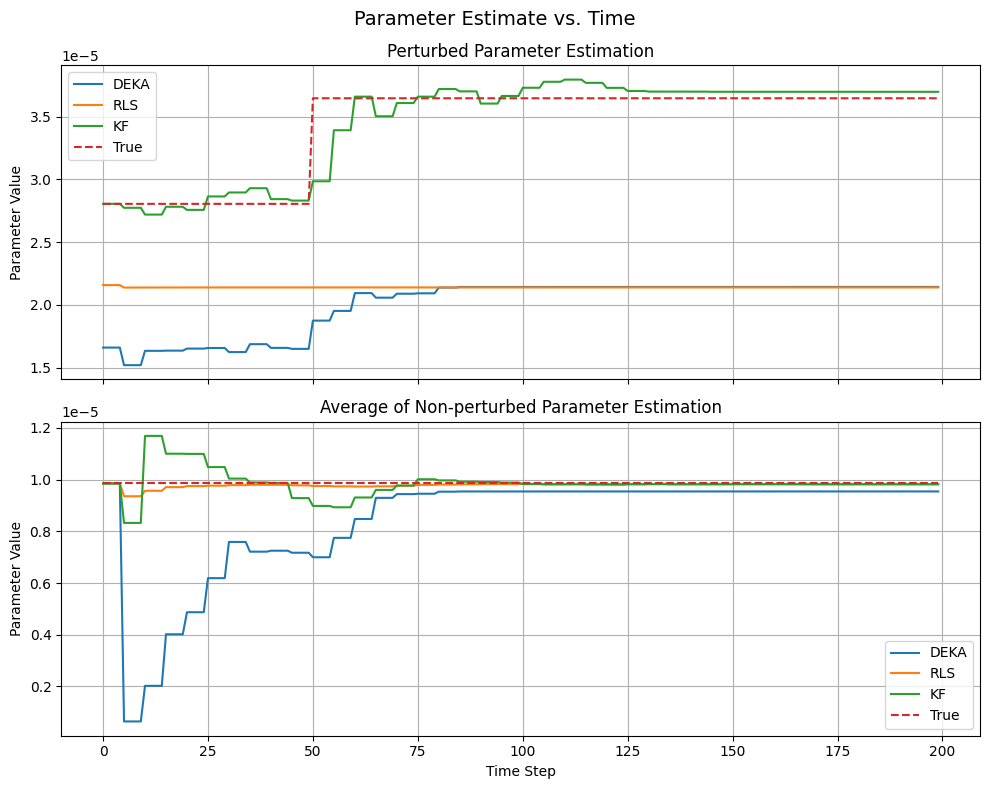

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following arrays are already defined:
# t: a 1D array for time steps
# theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# theta_deka_array: true parameter values, shape (N, num_params)

# Create one figure with two subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# ---------------------------
# Subplot 1: Parameter 0 (shifted parameter)
# ---------------------------
fig.suptitle('Parameter Estimate vs. Time', fontsize=14)

axs[0].plot(t, theta_hat_deka_array[:, 0], label='DEKA')
axs[0].plot(t, theta_hat_rls_array[:, 0], label='RLS')
axs[0].plot(t, theta_hat_ekf_array[:, 0], label='KF')
axs[0].plot(t, theta_ekf_array[:, 0], '--', label='True')
axs[0].set_title('Perturbed Parameter Estimation')
axs[0].set_ylabel('Parameter Value')
axs[0].legend()
axs[0].grid(True)

# ---------------------------
# Subplot 2: Average of Remaining Parameters (parameters 1 to end)
# ---------------------------
# Compute the average (across parameter indices 1 to end) for each time step.
theta_hat_deka_avg = np.mean(theta_hat_deka_array[:, 1:], axis=1)
theta_hat_rls_avg  = np.mean(theta_hat_rls_array[:, 1:], axis=1)
theta_hat_ekf_avg  = np.mean(theta_hat_ekf_array[:, 1:], axis=1)
theta_deka_avg     = np.mean(theta_deka_array[:, 1:], axis=1)

axs[1].plot(t, theta_hat_deka_avg, label='DEKA')
axs[1].plot(t, theta_hat_rls_avg, label='RLS')
axs[1].plot(t, theta_hat_ekf_avg, label='KF')
axs[1].plot(t, theta_deka_avg, '--', label='True')
axs[1].set_title('Average of Non-perturbed Parameter Estimation')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Parameter Value')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


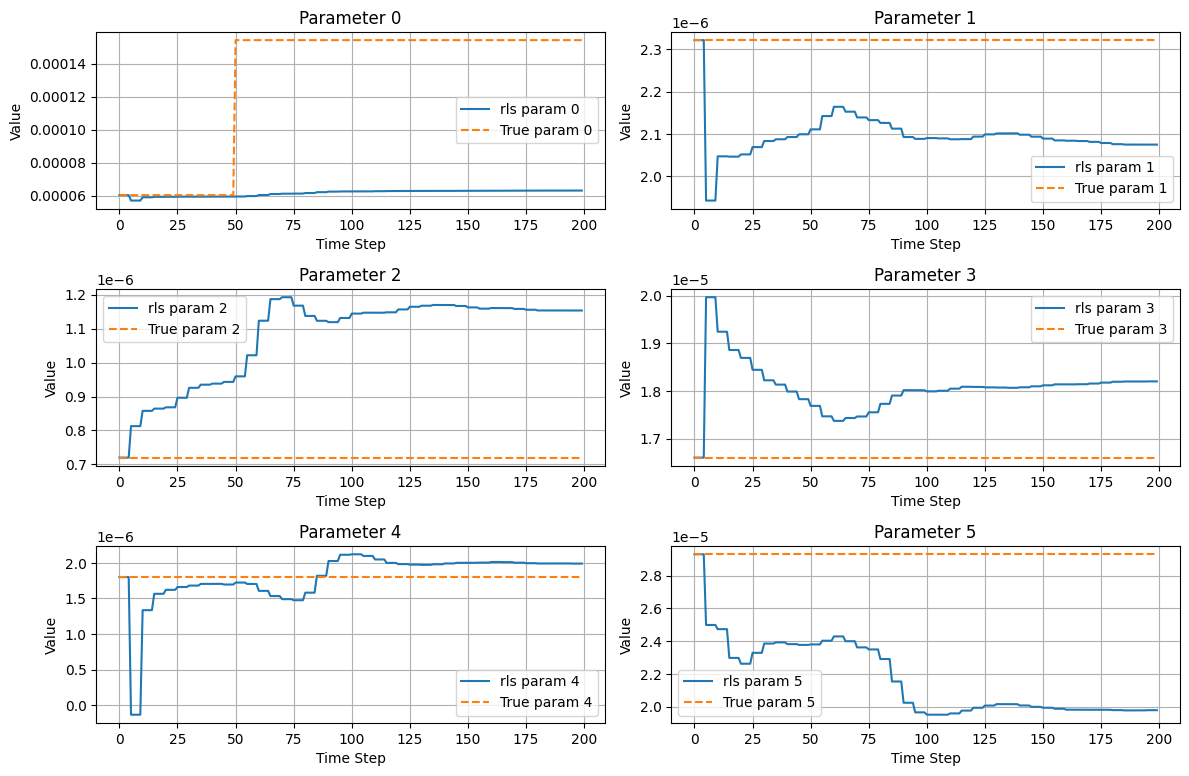

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten() # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_rls_array[:, j], label=f'rls param {j}')
    axs[j].plot(t, theta_rls_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)


plt.tight_layout()
plt.show()


## Simulate 100 times to obtain average mse comparison 

In [9]:
import numpy as np

param_est = OnlineParamEst()
num_runs = 1000

# Lists for DEKA
total_mse_deka_list = []
changed_mse_deka_list = []
unchanged_mse_deka_list = []

# Lists for RLS
total_mse_rls_list = []
changed_mse_rls_list = []
unchanged_mse_rls_list = []

# Lists for KF
total_mse_kf_list = []
changed_mse_kf_list = []
unchanged_mse_kf_list = []

for run_idx in range(num_runs):
    # 1) Run your three simulations
    x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA()
    x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS()
    x_kf,   u_kf,   theta_kf,   theta_hat_kf   = param_est.simulate_quadrotor_hover_with_KF()
    
    # 2) Convert lists to arrays (if needed)
    theta_deka_array     = np.array(theta_deka)
    theta_hat_deka_array = np.array(theta_hat_deka)
    theta_rls_array      = np.array(theta_rls)
    theta_hat_rls_array  = np.array(theta_hat_rls)
    theta_kf_array       = np.array(theta_kf)
    theta_hat_kf_array   = np.array(theta_hat_kf)

    # 3) Compute MSE for each method:
    # Total MSE (across all time steps & parameters)
    mse_total_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2)
    mse_total_rls  = np.mean((theta_hat_rls_array  - theta_rls_array)**2)
    mse_total_kf   = np.mean((theta_hat_kf_array   - theta_kf_array)**2)
    
    # MSE for the changed parameter (parameter 0)
    mse_changed_deka = np.mean((theta_hat_deka_array[:, 0] - theta_deka_array[:, 0])**2)
    mse_changed_rls  = np.mean((theta_hat_rls_array[:, 0]  - theta_rls_array[:, 0])**2)
    mse_changed_kf   = np.mean((theta_hat_kf_array[:, 0]   - theta_kf_array[:, 0])**2)
    
    # MSE for the unchanged parameters (parameters 1 to end)
    mse_unchanged_deka = np.mean((theta_hat_deka_array[:, 1:] - theta_deka_array[:, 1:])**2)
    mse_unchanged_rls  = np.mean((theta_hat_rls_array[:, 1:]  - theta_rls_array[:, 1:])**2)
    mse_unchanged_kf   = np.mean((theta_hat_kf_array[:, 1:]   - theta_kf_array[:, 1:])**2)
    
    # 4) Append the values to lists for later averaging
    total_mse_deka_list.append(mse_total_deka)
    changed_mse_deka_list.append(mse_changed_deka)
    unchanged_mse_deka_list.append(mse_unchanged_deka)
    
    total_mse_rls_list.append(mse_total_rls)
    changed_mse_rls_list.append(mse_changed_rls)
    unchanged_mse_rls_list.append(mse_unchanged_rls)
    
    total_mse_kf_list.append(mse_total_kf)
    changed_mse_kf_list.append(mse_changed_kf)
    unchanged_mse_kf_list.append(mse_unchanged_kf)

# 5) After num_runs, compute the average MSE for each metric
avg_total_mse_deka   = np.mean(total_mse_deka_list)
avg_changed_mse_deka = np.mean(changed_mse_deka_list)
avg_unchanged_mse_deka = np.mean(unchanged_mse_deka_list)

avg_total_mse_rls   = np.mean(total_mse_rls_list)
avg_changed_mse_rls = np.mean(changed_mse_rls_list)
avg_unchanged_mse_rls = np.mean(unchanged_mse_rls_list)

avg_total_mse_kf   = np.mean(total_mse_kf_list)
avg_changed_mse_kf = np.mean(changed_mse_kf_list)
avg_unchanged_mse_kf = np.mean(unchanged_mse_kf_list)

# 6) Print the results
print("DEKA:")
print("  Average Total MSE:", avg_total_mse_deka)
print("  Average MSE of changed parameter (param 0):", avg_changed_mse_deka)
print("  Average MSE of unchanged parameters:", avg_unchanged_mse_deka)

print("\nRLS:")
print("  Average Total MSE:", avg_total_mse_rls)
print("  Average MSE of changed parameter (param 0):", avg_changed_mse_rls)
print("  Average MSE of unchanged parameters:", avg_unchanged_mse_rls)

print("\nKF:")
print("  Average Total MSE:", avg_total_mse_kf)
print("  Average MSE of changed parameter (param 0):", avg_changed_mse_kf)
print("  Average MSE of unchanged parameters:", avg_unchanged_mse_kf)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           

c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:107: RuntimeWarning: overflow encountered in matmul
  domg = inv(self.J)@(-self.hat(omg)@self.J@omg + np.array([[-self.el*self.kt, -self.el*self.kt, self.el*self.kt, self.el*self.kt], [-self.el*self.kt, self.el*self.kt, self.el*self.kt, -self.el*self.kt], [-self.km, self.km, -self.km, self.km]])@u)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:105: RuntimeWarning: invalid value encountered in matmul
  dq = 0.5*self.L(q)@self.H@omg
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:107: RuntimeWarning: invalid value encountered in matmul
  domg = inv(self.J)@(-self.hat(omg)@self.J@omg + np.array([[-self.el*self.kt, -self.el*self.kt, self.el*self.kt, self.el*self.kt], [-self.el*self.kt, self.el*self.kt, self.el*self.kt, -self.el*self.kt], [-self.km, self.km, -self.km, self.

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:260: RuntimeWarning: overflow encountered in matmul
  K = self.P @ A.T @ np.linalg.inv(A @ self.P @ A.T + self.R)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:526: RuntimeWarning: overflow encountered in square
  A_row_norms_sq = np.sum(A**2, axis=1) + 1e-10


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:167: RuntimeWarning: invalid value encountered in scalar subtract
  [w_x*w_z, a_p+w_y*w_z, w_z**2-w_x**2, a_q, a_r-w_x*w_y, -w_x*w_z],  # τy equation
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:168: RuntimeWarning: invalid value encountered in scalar subtract
  [-w_x*w_y, w_x**2-w_y**2, a_p-w_y*w_z, w_x*w_y, a_q+w_x*w_z, a_r]  # τz equation
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\LQR_controller.py:39: RuntimeWarning: invalid value encountered in matmul
  return u_nom - K_lqr @ delta_x
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:260: RuntimeWarning: invalid value encountered in matmul
  K = self.P @ A.T @ np.linalg.inv(A @ self.P @ A.T + self.R)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\p

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:166: RuntimeWarning: overflow encountered in scalar multiply
  [a_p, a_q-w_x*w_z, a_r+w_x*w_y, -w_y*w_z, w_y**2+w_z**2, w_y*w_z],  # τx equation (angular acceleration)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:166: RuntimeWarning: overflow encountered in scalar power
  [a_p, a_q-w_x*w_z, a_r+w_x*w_y, -w_y*w_z, w_y**2+w_z**2, w_y*w_z],  # τx equation (angular acceleration)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:167: RuntimeWarning: overflow encountered in scalar multiply
  [w_x*w_z, a_p+w_y*w_z, w_z**2-w_x**2, a_q, a_r-w_x*w_y, -w_x*w_z],  # τy equation
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:167: RuntimeWarning: overflow encountered in scalar power
  [w_x*w_z, a_p+w_y*w_z, w_z**2-w_x**2, a_q,

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:519: RuntimeWarning: invalid value encountered in matmul
  residual = (b - A @ self.x_k).squeeze()


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:169: RuntimeWarning: invalid value encountered in matmul
  self.P
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:171: RuntimeWarning: invalid value encountered in matmul
  @ np.linalg.inv(A @ self.P @ A.T + self.lambda_ * np.eye(A.shape[0]))
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:173: RuntimeWarning: invalid value encountered in matmul
  self.theta_hat += K @ (b - A @ self.theta_hat)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:106: RuntimeWarning: invalid value encountered in matmul
  dv = np.array([0, 0, -self.g]) + (1/mass)*Q@np.array([[0, 0, 0, 0], [0, 0, 0, 0], [self.kt, self.kt, self.kt, self.kt]])@u
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:107: RuntimeWarning: invalid value encountered in add
  domg = inv(self.J)@(-self.hat(omg)@self.J@omg + np.array([[-self.el*self.kt, -self.el*self.kt, self.el*self.kt, self.el*self.kt], [-self.el*self.kt, self.el*self.kt, self.el*self.kt, -self.el*self.kt], [-self.km, self.km, -self.km, self.km]])@u)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:99: RuntimeWarning: invalid value encountered in divide
  q = x[3:7]/norm(x[3:7])  # normalize quaternion
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dy

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           

c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:527: RuntimeWarning: overflow encountered in square
  max_ratio = np.max(np.abs(residual) ** 2 / A_row_norms_sq)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:527: RuntimeWarning: invalid value encountered in divide
  max_ratio = np.max(np.abs(residual) ** 2 / A_row_norms_sq)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:532: RuntimeWarning: overflow encountered in square
  eta_k = np.where(residual ** 2 / A_row_norms_sq >= epsilon_k * res_norm_sq, residual, 0).reshape(-1, 1)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\estimation_methods.py:532: RuntimeWarning: invalid value encountered in divide
  eta_k = np.where(residual ** 2 / A_row_norms_sq >= epsilon_k * res_norm_sq, residual, 0).reshape(-1, 1)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]


c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:166: RuntimeWarning: invalid value encountered in scalar subtract
  [a_p, a_q-w_x*w_z, a_r+w_x*w_y, -w_y*w_z, w_y**2+w_z**2, w_y*w_z],  # τx equation (angular acceleration)
c:\Users\User\Desktop\Online-Parameter-Estimation-Using-the-Kaczmarz-Method\python\quadrotor_dynamics.py:166: RuntimeWarning: invalid value encountered in scalar add
  [a_p, a_q-w_x*w_z, a_r+w_x*w_y, -w_y*w_z, w_y**2+w_z**2, w_y*w_z],  # τx equation (angular acceleration)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           

KeyboardInterrupt: 